<a href="https://colab.research.google.com/github/brindanaveen0109/FlickPicks/blob/main/flickpicks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING THE DATA FILES REQUIRED**


In [3]:
import pandas as pd

In [7]:
movies = pd.read_csv("/content/datasets/movies.csv")
ratings = pd.read_csv("/content/datasets/ratings.csv")

In [3]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [8]:
ratings

,userId,movieId,rating,timestamp
0,1,296,5.0,1.147880e+09
1,1,306,3.5,1.147869e+09
2,1,307,5.0,1.147869e+09
3,1,665,5.0,1.147879e+09
4,1,899,3.5,1.147869e+09
...,...,...,...,...
250443,1755,90647,4.0,1.555935e+09
250444,1755,91542,4.5,1.556107e+09
250445,1755,95105,4.0,1.555936e+09
250446,1755,95543,4.0,1.555936e+09


In [9]:
mergedDataset = pd.merge(movies, ratings, on = "movieId")

In [10]:
mergedDataset

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1.141416e+09
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1.439472e+09
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,1.573944e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,8.586259e+08
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,8.904925e+08
...,...,...,...,...,...,...
250443,206861,"Live Like a Cop, Die Like a Man (1976)",Action|Crime|Drama|Thriller,1228,2.5,1.569763e+09
250444,207309,Fractured (2019),Thriller,973,3.5,1.571933e+09
250445,207309,Fractured (2019),Thriller,1068,3.0,1.571610e+09
250446,208002,The Kill Team (2019),Drama|War,973,3.5,1.572364e+09


# **DATA PREPROCESSING**

In [11]:
mergedDataset.describe()

,movieId,userId,rating,timestamp
count,250448.000000,250448.000000,250448.000000,2.504470e+05
mean,21004.434126,904.465334,3.550927,1.207810e+09
std,39063.202888,500.560289,1.063022,2.369761e+08
min,1.000000,1.000000,0.500000,8.280963e+08
25%,1100.000000,497.000000,3.000000,9.853824e+08
50%,2735.000000,900.000000,4.000000,1.173210e+09
75%,7980.000000,1336.000000,4.000000,1.448053e+09
max,208793.000000,1755.000000,5.000000,1.574254e+09


In [12]:
mergedDataset.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1.141416e+09
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1.439472e+09
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,1.573944e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,8.586259e+08
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,8.904925e+08


In [13]:
mergedDataset.tail()

,movieId,title,genres,userId,rating,timestamp
250443,206861,"Live Like a Cop, Die Like a Man (1976)",Action|Crime|Drama|Thriller,1228,2.5,1.569763e+09
250444,207309,Fractured (2019),Thriller,973,3.5,1.571933e+09
250445,207309,Fractured (2019),Thriller,1068,3.0,1.571610e+09
250446,208002,The Kill Team (2019),Drama|War,973,3.5,1.572364e+09
250447,208793,Watchman (2019),Drama|Thriller,1652,3.5,1.573591e+09


In [14]:
mergedDataset.isna().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    1
dtype: int64

In [15]:
mergedDataset.isnull().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    1
dtype: int64

In [16]:
mergedDataset.drop('timestamp', axis = 1, inplace = True)

In [17]:
mergedDataset

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0
...,...,...,...,...,...
250443,206861,"Live Like a Cop, Die Like a Man (1976)",Action|Crime|Drama|Thriller,1228,2.5
250444,207309,Fractured (2019),Thriller,973,3.5
250445,207309,Fractured (2019),Thriller,1068,3.0
250446,208002,The Kill Team (2019),Drama|War,973,3.5


In [18]:
mergedDataset[mergedDataset['rating'] < 0]

,movieId,title,genres,userId,rating


**SPLITTING THE GENRES THAT HAS COME MULTIPLE TIMES**

In [19]:
def split_genre(genre_string):
  return genre_string.split("|")

In [20]:
allgenres = []
for genre in mergedDataset["genres"]:
  individual_genres = split_genre(genre)
  allgenres.extend(set(individual_genres))
unique_genres = set(allgenres)
unique_genres

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

# **VISUALISATION/EDA**

In [21]:
import matplotlib.pyplot as plt

**USING HISTOGRAM TO PLOT MOVIE RATINGS AND NUMBER OF MOVIES BASED ON DISTIBUTION OF RATINGS**

Text(0.5, 1.0, 'Distribution of movie ratings')

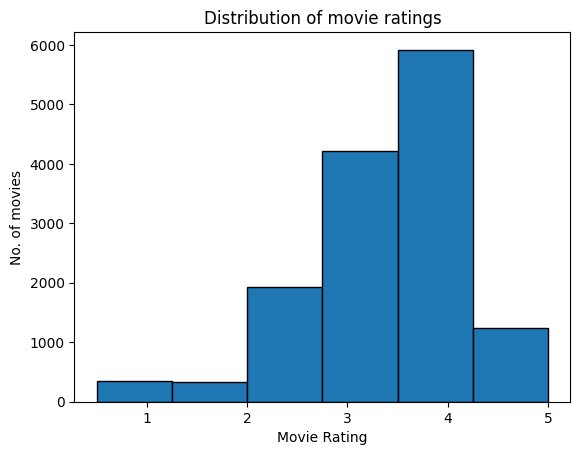

In [25]:
movie_ratings = mergedDataset.groupby("movieId")["rating"].mean()
plt.hist(movie_ratings, bins = 6, edgecolor = "black")
plt.xlabel("Movie Rating")
plt.ylabel("No. of movies")
plt.title("Distribution of movie ratings")

**USING SCATTERPLOT FOR USER ANALYSIS**

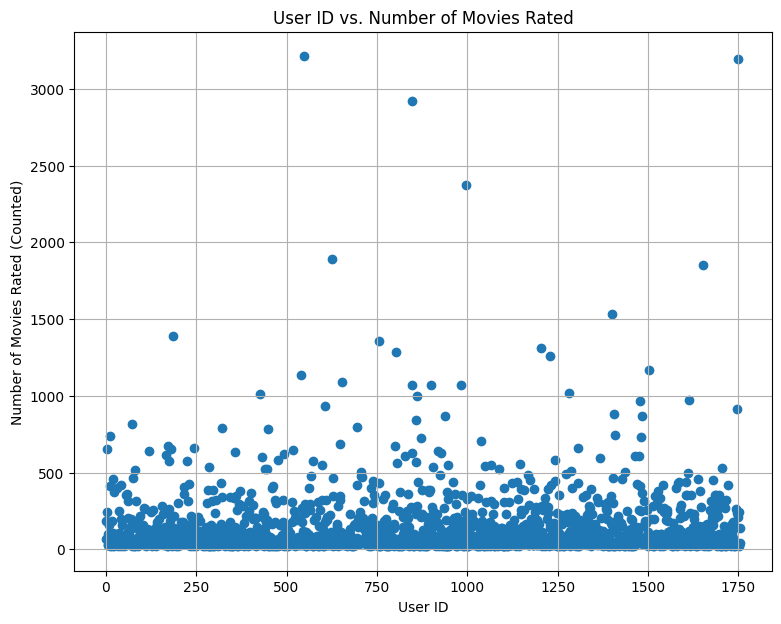

In [31]:
user_movie_count = mergedDataset.groupby('userId')['movieId'].count()
plt.figure(figsize=(9, 7))
plt.scatter(user_movie_count.index, user_movie_count.values)
plt.xlabel('User ID')
plt.ylabel('Number of Movies Rated (Counted)')
plt.title('User ID vs. Number of Movies Rated')
plt.grid(True)
plt.show()